In [3]:
import numpy as np
import pylab as plb
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [4]:
df = pd.read_csv('FuelData.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2016,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.3,6.6,8.1,35,189
1,2016,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.7,9.1,11.1,25,254
2,2016,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.1,10.7,26,251
3,2016,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.4,8.6,10.7,26,249
4,2016,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,235


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(8)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.1,189
1,3.5,6,11.1,254
2,3.5,6,10.7,251
3,3.5,6,10.7,249
4,3.5,6,10.0,235
5,3.5,6,7.7,180
6,2.4,4,8.3,196
7,3.5,6,9.6,226


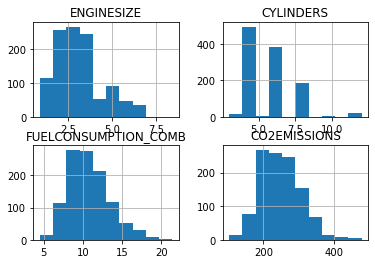

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.hist()
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [17]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
train_x = np.asanyarray(train[['ENGINESIZE']])
test_x = np.asanyarray(test[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  2.5  ,  6.25 , 15.625],
       [ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.   ,  4.   ,  8.   ]])

In [18]:
regr = linear_model.LinearRegression()
regr.fit(train_x_poly,train_y)

print('Coefficient: ',regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficient:  [[ 0.         59.40123264 -3.86820991  0.11708923]]
Intercept:  [102.6878327]


In [20]:
test_x_poly = poly.fit_transform(test_x)
pred=regr.predict(test_x_poly)

print('MAE: %.2f'%np.mean(np.absolute(pred-test_y)))
print('MSE: %.2f'%np.mean((pred-test_y)**2))
print('variance_score: ',regr.score(test_x_poly,test_y))


MAE: 22.28
MSE: 829.01
variance_score:  0.6989417257878132


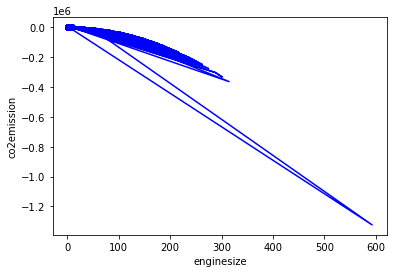

In [26]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('enginesize')
plt.ylabel('co2emission')
plt.plot(train_x_poly, regr.intercept_[0] + regr.coef_[0][1]*train_x_poly+regr.coef_[0][2]*np.power(train_x_poly,2),'-b')